In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Step 1: Load the dataset into a DataFrame
data = pd.read_csv('train.csv')

In [20]:
# Step 2: Data Cleaning
# Let's start by checking the missing values in the dataset
print(data.isnull().sum())

# Fill missing values for 'Age' with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop unnecessary columns that won't contribute to the analysis
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
# Exploring the relationships between variables and identify patterns and trends in the data

Survival Rate:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


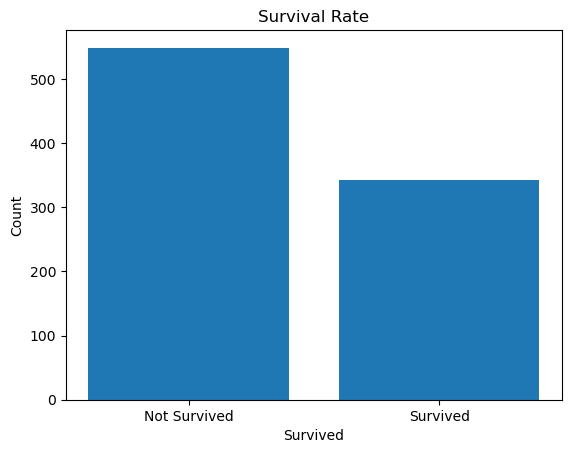

In [23]:
# Checking the overall survival rate
survival_rate = data['Survived'].value_counts(normalize=True) * 100
print(f"Survival Rate:\n{survival_rate}")

# Visualizing the survival rate
plt.bar(['Not Survived', 'Survived'], data['Survived'].value_counts())
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Rate')
plt.show()

Survival Rate by Pclass:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


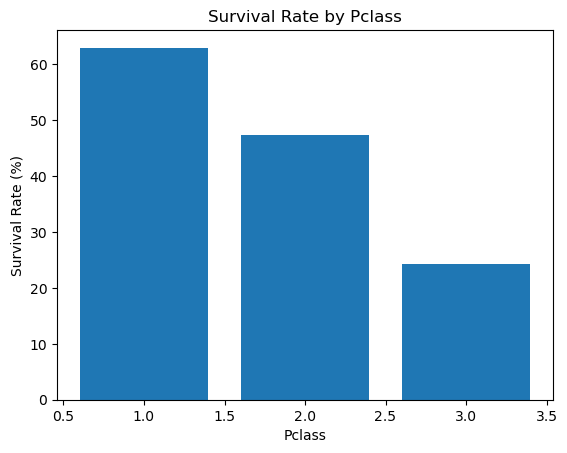

In [24]:
# Exploring the relationship between 'Pclass' and 'Survived'
pclass_survived = data.groupby('Pclass')['Survived'].mean() * 100
print(f"Survival Rate by Pclass:\n{pclass_survived}")

# Visualizing the relationship between 'Pclass' and 'Survived'
plt.bar(pclass_survived.index, pclass_survived.values)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Pclass')
plt.show()

Survival Rate by Sex:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


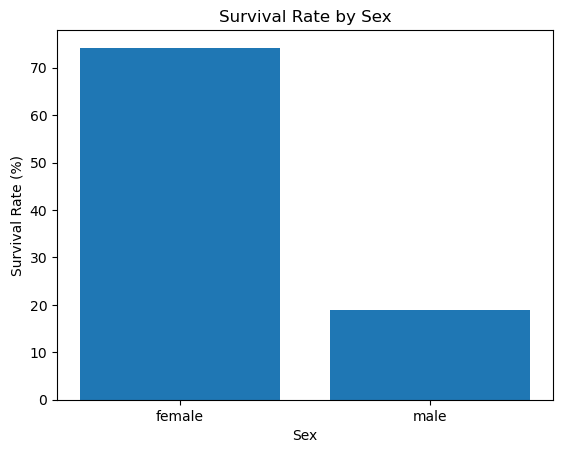

In [25]:
# Exploring the relationship between 'Sex' and 'Survived'
sex_survived = data.groupby('Sex')['Survived'].mean() * 100
print(f"Survival Rate by Sex:\n{sex_survived}")

# Visualizing the relationship between 'Sex' and 'Survived'
plt.bar(sex_survived.index, sex_survived.values)
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Sex')
plt.show()

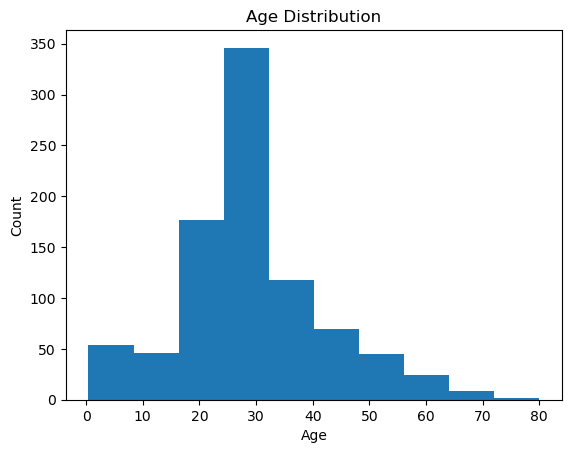

In [28]:
# Exploring the age distribution of passengers
plt.hist(data['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

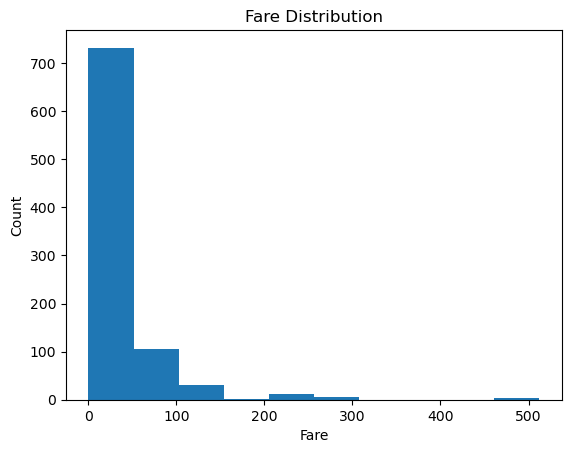

In [32]:
# Explorinng the fare distribution of passengers
plt.hist(data['Fare'], bins=10)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution')
plt.show()